In [2]:
import pyforest

In [3]:
from tqdm import tqdm

In [4]:
edgelist = pd.read_csv('Data/elliptic_bitcoin_dataset/elliptic_txs_edgelist.csv')

<IPython.core.display.Javascript object>

In [5]:
classes = pd.read_csv('Data/elliptic_bitcoin_dataset/elliptic_txs_classes.csv')

<IPython.core.display.Javascript object>

In [6]:
edgelist

,txId1,txId2
0,230425980,5530458
1,232022460,232438397
2,230460314,230459870
3,230333930,230595899
4,232013274,232029206
...,...,...
234350,158365409,157930723
234351,188708874,188708879
234352,157659064,157659046
234353,87414554,106877725


In [7]:
edgelist.nunique()

txId1    166345
txId2    148447
dtype: int64

In [10]:
random = []

In [11]:
random = edgelist['txId1']

In [12]:
random

0         230425980
1         232022460
2         230460314
3         230333930
4         232013274
            ...    
234350    158365409
234351    188708874
234352    157659064
234353     87414554
234354    158589452
Name: txId1, Length: 234355, dtype: int64

In [13]:
random = random.append(edgelist['txId2'])

In [14]:
len(set(random))

203769

In [15]:
classes

,txId,class
0,230425980,unknown
1,5530458,unknown
2,232022460,unknown
3,232438397,2
4,230460314,unknown
...,...,...
203764,173077460,unknown
203765,158577750,unknown
203766,158375402,1
203767,158654197,unknown


In [16]:
test1 = pd.merge(edgelist,classes,how='inner',left_on='txId1',right_on='txId')

<IPython.core.display.Javascript object>

In [17]:
edgelist

,txId1,txId2
0,230425980,5530458
1,232022460,232438397
2,230460314,230459870
3,230333930,230595899
4,232013274,232029206
...,...,...
234350,158365409,157930723
234351,188708874,188708879
234352,157659064,157659046
234353,87414554,106877725


In [18]:
test1

,txId1,txId2,txId,class
0,230425980,5530458,230425980,unknown
1,232022460,232438397,232022460,unknown
2,232022460,232022462,232022460,unknown
3,230460314,230459870,230460314,unknown
4,230460314,230460307,230460314,unknown
...,...,...,...,...
234350,157631640,21644119,157631640,2
234351,157579987,157579982,157579987,unknown
234352,158365409,157930723,158365409,1
234353,188708874,188708879,188708874,unknown


In [19]:
test1.nunique()

txId1    166345
txId2    148447
txId     166345
class         3
dtype: int64

In [20]:
test1['class'].value_counts()

unknown    181157
2           49827
1            3371
Name: class, dtype: int64

In [21]:
test1 = test1.drop(columns='txId')

In [22]:
test1

,txId1,txId2,class
0,230425980,5530458,unknown
1,232022460,232438397,unknown
2,232022460,232022462,unknown
3,230460314,230459870,unknown
4,230460314,230460307,unknown
...,...,...,...
234350,157631640,21644119,2
234351,157579987,157579982,unknown
234352,158365409,157930723,1
234353,188708874,188708879,unknown


In [23]:
test2 = pd.merge(test1,classes,how='inner',left_on='txId2',right_on='txId')

<IPython.core.display.Javascript object>

In [24]:
test2 = test2.drop(columns='txId')

In [25]:
test2

,txId1,txId2,class_x,class_y
0,230425980,5530458,unknown,unknown
1,232022460,232438397,unknown,2
2,230423018,232438397,2,2
3,230425284,232438397,unknown,2
4,1913117,232438397,2,2
...,...,...,...,...
234350,158594124,157631640,2,2
234351,180061133,189207658,unknown,unknown
234352,188724578,167179460,unknown,unknown
234353,157631640,21644119,2,2


<IPython.core.display.Javascript object>

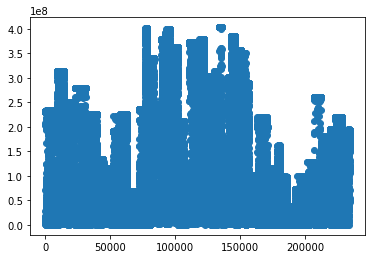

In [42]:
plt.scatter(test2.index,test2['txId1'],)

In [26]:
classes.loc[classes['txId']==232438397]

,txId,class
3,232438397,2


In [27]:
test2.loc[test2['class_x']=='1']


,txId1,txId2,class_x,class_y
38,16754007,232438397,1,2
1285,24155910,230683551,1,2
1402,3205536,230451730,1,2
1638,230389796,2717498,1,2
1641,17387772,2717498,1,2
...,...,...,...,...
232245,159033526,157929208,1,2
232253,158360758,157929208,1,2
232256,159028476,157929208,1,2
233606,158378208,159039422,1,1


In [28]:
ilicit_transactions = test2.loc[test2['class_x']=='1']


In [30]:
import networkx as nx

In [43]:
test = ilicit_transactions.sample(20)

<IPython.core.display.Javascript object>

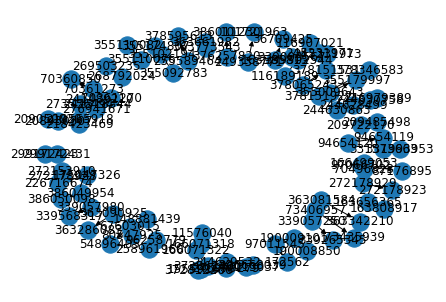

In [33]:
graph = nx.from_pandas_edgelist(test, source = 'txId1', target = 'txId2', 
                                 create_using = nx.DiGraph())
pos = nx.spring_layout(graph)
nx.draw(graph, cmap = plt.get_cmap('rainbow'), with_labels=True, pos=pos)

<IPython.core.display.Javascript object>

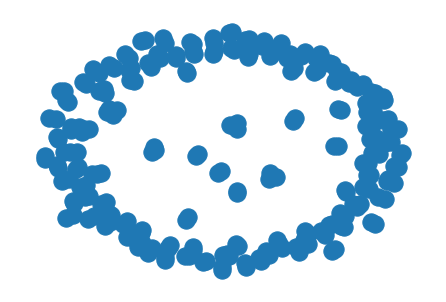

In [38]:
graph1 = nx.from_pandas_edgelist(test, source = 'txId1', target = 'txId2', 
                                 create_using = nx.Graph())
pos1 = nx.spring_layout(graph1)
nx.draw(graph1, cmap = plt.get_cmap('rainbow'), with_labels=False, pos=pos1)

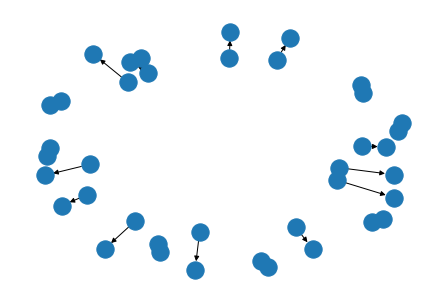

In [44]:
graph = nx.from_pandas_edgelist(test, source = 'txId1', target = 'txId2', 
                                 create_using = nx.DiGraph())
pos = nx.spring_layout(graph)
nx.draw(graph, with_labels=False, pos=pos)

272078777
272529604
339643017
226821074
72034735
73154970
166073496
163654828
272077842
183381254
139274013
139273997
163654969
163654968
246044514
139532229
71993480
73160850
174938459
186359097
246066237
139276570
72294238
72629836
355102455
355174807
378415649
378593993
69593976
70360850
139274505
84749894
124012816
133212313
209485480
310524772
310524764
243780856
244630834


In [45]:
graph.nodes

NodeView((272078777, 272529604, 339643017, 226821074, 72034735, 73154970, 166073496, 163654828, 272077842, 183381254, 139274013, 139273997, 163654969, 163654968, 246044514, 139532229, 71993480, 73160850, 174938459, 186359097, 246066237, 139276570, 72294238, 72629836, 355102455, 355174807, 378415649, 378593993, 69593976, 70360850, 139274505, 84749894, 124012816, 133212313, 209485480, 310524772, 310524764, 243780856, 244630834))

In [40]:
import pygraphviz as pgv

In [41]:
G = pgv.AGraph()

In [ ]:
G.add_edges_from